In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [150]:
# load results
in1k = pd.read_csv(r'results/imagenet_mean.csv')
inv2 = pd.read_csv(r'results/imagenet_v2_mean.csv')
inr = pd.read_csv(r'results/imagenet_r_mean.csv')
ina = pd.read_csv(r'results/imagenet_a_mean.csv')

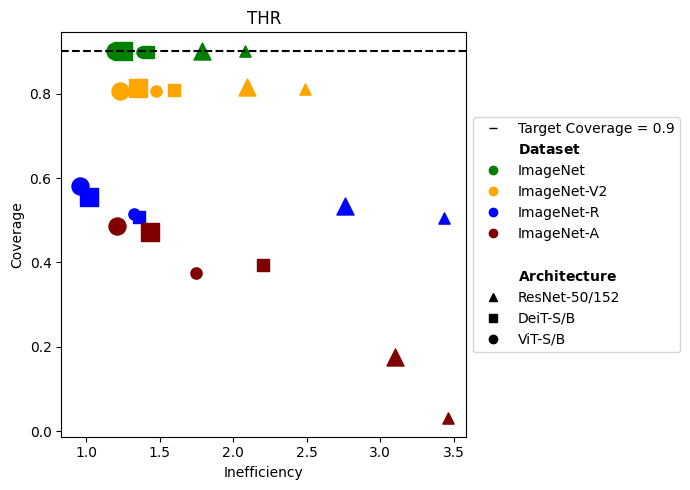

In [152]:
# Define marker types for each model
marker_types = {
    'resnet152': '^',
    'resnet50': '^',
    'deit3S': 's',
    'deit3B': 's',
    'vitS': 'o',
    'vitB': 'o',
}
colors = ['green', 'orange', 'blue', 'maroon']
patches = []

# Create the scatter plot
plt.figure(figsize=(7, 5))  # Optional: Set the figure size

for i, df in enumerate([in1k, inv2, inr, ina]):
    for _, row in df.iterrows():
        model = row['model']
        x = row['size_thr']
        y = row['cov_thr']
        marker = marker_types[model]
        color = colors[i]
        big = True if model in ['resnet152', 'deit3B', 'vitB'] else False

        plt.scatter(x, y, marker=marker, color=color, s = 150 if big else 65)

# Add a horizontal line at y=0.9
plt.axhline(y=0.9, color='black', linestyle='--')

# Set labels and title
plt.xlabel('Inefficiency')
plt.ylabel('Coverage')
plt.title('THR')

labels = ['Target Coverage = 0.9',
          '$\mathbf{Dataset}$',
          'ImageNet',
          'ImageNet-V2',
          'ImageNet-R',
          'ImageNet-A',
          '',
          '$\mathbf{Architecture}$',
          'ResNet-50/152',
          'DeiT-S/B',
          'ViT-S/B',
         ]

# Create the legend with subgroups
legend_elements = [
    plt.Line2D([], [], marker='_', color='black', linestyle='None', label='cov'),
    plt.Line2D([], [], marker='None', color='black', linestyle='None', label='dataset'),

     plt.Line2D([], [], marker='o', color='green', linestyle='None', label='in'),
    plt.Line2D([], [], marker='o', color='orange', linestyle='None', label='inv2'),
     plt.Line2D([], [], marker='o', color='blue', linestyle='None', label='inr'),
    plt.Line2D([], [], marker='o', color='maroon', linestyle='None', label='ina'),
    
    plt.Line2D([], [], marker='None', color='maroon', linestyle='None', label='space'),
    plt.Line2D([], [], marker='None', color='maroon', linestyle='None', label='arch'),
    plt.Line2D([], [], marker='^', color='black', linestyle='None', label='arch'),
    plt.Line2D([], [], marker='s', color='black', linestyle='None', label='arch'),
    plt.Line2D([], [], marker='o', color='black', linestyle='None', label='arch'),


]

handles = [element for element in legend_elements]
labels = [label for label in labels]

# Create the legend
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))


# Adjust the plot to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()
